In [ ]:
!pip install -r requirements.txt

In [1]:
!pip install gdown
!pip install ipython-autotime
%load_ext autotime

time: 1.91 ms (started: 2021-03-04 11:48:12 +00:00)


# Train & Test authors

In [2]:
!gdown "https://drive.google.com/uc?id=1Qbi954Bwx-PplM8F_7TrB_blcqcB-bF2"

Downloading...
From: https://drive.google.com/uc?id=1Qbi954Bwx-PplM8F_7TrB_blcqcB-bF2
To: /content/train.csv
100% 305k/305k [00:00<00:00, 45.3MB/s]
time: 1.42 s (started: 2021-03-04 11:48:12 +00:00)


In [3]:
!gdown "https://drive.google.com/uc?id=1hWycEy8rQ8e_krGyUhqGQiMBxZtD9SWy"

Downloading...
From: https://drive.google.com/uc?id=1hWycEy8rQ8e_krGyUhqGQiMBxZtD9SWy
To: /content/test.csv
2.47MB [00:00, 79.1MB/s]
time: 1.82 s (started: 2021-03-04 11:48:13 +00:00)


# Graphs features

In [4]:
!gdown "https://drive.google.com/uc?id=1j7h-SUy2gMJBds6eQalw4CFZC3O7Pr05"

Downloading...
From: https://drive.google.com/uc?id=1j7h-SUy2gMJBds6eQalw4CFZC3O7Pr05
To: /content/collaboration_network.edgelist
38.8MB [00:00, 75.3MB/s]
time: 2.62 s (started: 2021-03-04 11:48:15 +00:00)


In [5]:
!gdown "https://drive.google.com/uc?id=1ewZowFKZNSXwaH9yt5Ad4-ieOHpyV1W1"

Downloading...
From: https://drive.google.com/uc?id=1ewZowFKZNSXwaH9yt5Ad4-ieOHpyV1W1
To: /content/X_train_graph.csv
4.67MB [00:00, 32.9MB/s]
time: 2.22 s (started: 2021-03-04 11:48:18 +00:00)


In [6]:
!gdown "https://drive.google.com/uc?id=1obp93WcXFh22mZMhuLguKtIEPNaJXlyD"

Downloading...
From: https://drive.google.com/uc?id=1obp93WcXFh22mZMhuLguKtIEPNaJXlyD
To: /content/X_test_graph.csv
42.1MB [00:00, 74.5MB/s]
time: 2.82 s (started: 2021-03-04 11:48:20 +00:00)


# Abstract embeddings

In [7]:
!gdown "https://drive.google.com/uc?id=1yQuJlP_Igc5W2zZUEgupwvj9SNSfUTRV"

Downloading...
From: https://drive.google.com/uc?id=1yQuJlP_Igc5W2zZUEgupwvj9SNSfUTRV
To: /content/author_to_embeddings_scibert_uncased.npy
1.44GB [00:14, 99.5MB/s]
time: 39.3 s (started: 2021-03-04 11:48:23 +00:00)


In [8]:
!gdown "https://drive.google.com/uc?id=1AEn8P631y-pq6szgAbTm538oM6waf-5E"

Downloading...
From: https://drive.google.com/uc?id=1AEn8P631y-pq6szgAbTm538oM6waf-5E
To: /content/author_embedding.csv
683MB [00:23, 28.7MB/s]
time: 40.6 s (started: 2021-03-04 11:49:02 +00:00)


# Node embeddings

In [31]:
!gdown "https://drive.google.com/uc?id=1-7PiaxpmYiPKsRdMIlkKqfpJjR_zy5HE"

Downloading...
From: https://drive.google.com/uc?id=1-7PiaxpmYiPKsRdMIlkKqfpJjR_zy5HE
To: /content/Deepwalk_256_30_100.csv
1.19GB [00:10, 119MB/s]
time: 23.8 s (started: 2021-03-04 12:19:12 +00:00)


# Merging and reading data

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

# read training data
df_train = pd.read_csv('train.csv', dtype={'authorID': np.int64, 'h_index': np.float32})
n_train = df_train.shape[0]

# read test data
df_test = pd.read_csv('test.csv', dtype={'authorID': np.int64})
n_test = df_test.shape[0]

time: 1.16 s (started: 2021-03-04 11:49:44 +00:00)


In [11]:
G = nx.read_edgelist('collaboration_network.edgelist',
                     delimiter=' ', nodetype=int)
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

time: 8.33 s (started: 2021-03-04 11:49:45 +00:00)


In [12]:
# Read train and test graph features
X_train_graph = pd.read_csv('X_train_graph.csv', index_col=0)
X_test_graph = pd.read_csv('X_test_graph.csv', index_col=0)

time: 534 ms (started: 2021-03-04 11:49:53 +00:00)


In [41]:
# read embeddings of abstracts
embeddings_abstracts = np.load('author_to_embeddings_scibert_uncased.npy', allow_pickle=True).item()
embeddings_abstracts = pd.DataFrame.from_dict(embeddings_abstracts, orient='index')
embeddings_abstracts.reset_index(inplace=True)
embeddings_abstracts.rename(columns={"index": "authorID"}, inplace=True)

time: 2min 27s (started: 2021-03-04 12:22:55 +00:00)


# Replacing authors with zeroed embeddings by the mean of their direct neighbors

In [42]:
zeros_author_id = embeddings_abstracts[(embeddings_abstracts.T == 0).any()]["authorID"]

time: 1.08 s (started: 2021-03-04 12:25:22 +00:00)


In [43]:
embeddings_abstracts_2 = pd.read_csv("author_embedding.csv", header=None)
embeddings_abstracts_2.rename(columns={0: 'authorID'}, inplace=True)
embeddings_abstracts = embeddings_abstracts_2.merge(embeddings_abstracts, on="authorID")

time: 21.2 s (started: 2021-03-04 12:25:53 +00:00)


In [44]:
embeddings_abstracts.set_index("authorID", inplace=True)

time: 2.69 ms (started: 2021-03-04 12:26:14 +00:00)


In [45]:
from tqdm.notebook import tqdm

authors_to_drop = []
for authorID in tqdm(zeros_author_id):
    neighbors = list(G.neighbors(authorID))
    if len(neighbors):
        neighbors_embeddings = embeddings_abstracts.query("authorID == @neighbors").mean(axis=0).values
        if np.sum(neighbors_embeddings) == 0:
            authors_to_drop.append(authorID)
        else:
            embeddings_abstracts.loc[authorID] = neighbors_embeddings
    else:
        authors_to_drop.append(authorID)


time: 3min 49s (started: 2021-03-04 12:26:14 +00:00)


In [46]:
embeddings_abstracts.reset_index(inplace=True)
embeddings_abstracts.rename(columns={"index": "authorID"}, inplace=True)

time: 5.33 ms (started: 2021-03-04 12:30:03 +00:00)


In [47]:
embeddings_nodes = pd.read_csv("Deepwalk_256_30_100.csv")
embeddings_nodes

,authorID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,2811232256,0.078322,0.425899,-0.282558,-0.212039,0.437473,-0.533683,0.118062,0.109346,0.153380,-0.091917,0.131568,0.142600,-0.323563,0.105417,-0.260582,1.025874,-0.238729,0.843510,-0.599690,0.055727,-0.121802,0.168530,-0.043600,-0.254090,-0.302414,-0.218395,0.488611,-0.224013,-0.009983,0.145883,0.580643,-0.146240,-0.018496,0.362598,0.126936,0.503825,-0.300405,-0.295040,-0.183400,...,0.271267,0.234581,0.449759,-0.747318,0.013454,-0.139800,-0.535146,-0.034288,0.319036,0.225892,0.408359,-0.096428,0.003071,0.359191,-0.428916,-0.244639,-0.118960,-0.469189,0.282080,0.149989,-0.006739,0.218743,0.221592,0.189575,-0.789706,0.046691,-0.182378,0.245982,0.140387,-0.832719,-0.119419,0.691741,-0.149556,0.216920,0.084310,0.386564,0.538023,-0.127464,-0.111425,0.410204
1,2231369732,-0.471883,0.559586,-0.163301,0.237019,-0.165376,-0.120098,0.047937,-0.236933,0.092725,-0.049726,0.707705,-0.230389,-0.389177,0.221694,0.168639,0.110412,0.215994,0.288412,-0.533525,0.209637,0.238793,-0.582479,0.521500,0.065697,0.460028,-0.328503,0.380392,-0.619274,0.435834,-0.750890,-0.768089,-0.286724,-0.552109,-0.152070,0.647019,0.207891,0.094218,-0.064490,-0.132373,...,0.223085,-0.037926,-0.312431,-0.109890,-0.086524,-0.201077,0.828090,0.122569,-0.130583,-0.691747,-0.178923,0.599113,-0.640131,-0.218122,-0.241580,0.626449,-0.141804,-0.457540,-0.581892,-0.051166,-0.218517,0.397215,-0.048215,0.068008,-0.065612,-0.063717,-0.558906,0.126132,0.201289,-0.327667,-0.443188,-0.691294,0.254635,-0.378854,0.130171,0.161605,-0.155014,0.274213,-0.480836,0.240680
2,2138570756,-0.348740,-0.636298,-0.471484,1.053085,-0.709146,-0.507657,0.264496,0.674356,-0.452875,-0.063166,0.186672,0.390289,-0.463047,0.109510,0.870878,0.091992,1.088165,0.592943,0.031754,-0.981353,0.554831,1.111873,0.137177,0.858939,0.018842,-0.288868,-0.836527,0.501834,-0.422141,-1.000779,-0.144457,-0.847862,0.634302,-0.366793,0.255091,-0.067136,-0.113507,0.249805,0.134027,...,0.372837,0.113388,0.096595,0.418761,0.448495,-0.944356,-0.264901,0.493232,1.385660,0.684338,-0.336780,0.639505,-0.991373,-0.107552,-0.421237,0.096745,-0.594588,-0.854068,0.995786,0.799913,-0.549937,0.322106,-0.191949,0.215680,0.769107,0.367288,-0.749021,-0.765478,-0.792780,-0.298891,-1.126784,-0.639824,0.049366,0.452313,0.643203,0.746429,1.086678,0.236849,0.340452,-0.757036
3,41943048,1.270913,-0.315748,0.310227,0.026623,0.540356,-0.338011,1.016998,-0.387781,0.143474,0.202624,0.715351,0.482565,0.445205,0.491785,-0.095650,1.701916,1.017774,-0.534539,-0.703506,0.593074,-0.154503,0.351308,-0.245392,-0.343607,-0.413617,-0.701321,0.869906,-0.866260,0.141226,0.413044,-0.405591,0.228429,-0.538031,0.028628,-0.065368,0.267358,-0.335964,0.804797,-0.465212,...,-0.440811,-0.735010,-0.577510,-0.943832,-0.320501,0.915926,0.278528,0.335984,0.417562,0.226836,0.668925,-0.603946,0.431352,-0.772272,0.440270,-0.017126,1.527564,-0.749838,-0.310076,0.705478,-0.604189,0.564075,0.439398,0.940764,0.129746,-0.299077,0.372555,0.524091,0.050374,-0.245328,0.645308,-0.518049,-0.118645,-1.096815,0.365355,0.902132,-0.157883,-0.275473,-0.112284,0.111466
4,2014838794,-0.099550,0.083398,-0.036287,0.462367,0.331648,-0.075080,0.256208,-0.046188,-0.445900,0.096864,0.297487,-0.135837,0.327910,0.049031,-0.211283,0.212004,-0.154033,0.414642,0.425927,-0.353696,0.052132,-0.157554,-0.081566,-0.106935,-0.026086,-0.211331,-0.331683,-0.198246,-0.348588,0.440369,-0.429626,-0.324424,-0.169719,0.098839,0.220807,0.351054,-0.061675,-0.119106,0.119979,...,0.181966,0.129280,0.683205,-0.082316,0.193911,-0.019069,-0.110586,0.185420,0.044359,0.238117,0.096932,0.262903,-0.417044,0.109975,-0.234698,-0.551077,-0.369400,0.333238,0.155876,0.230078,0.147910,0.101246,-0.000578,-0.104032,-0.030537,-0.250839,-0.226444,-0.208137,0

time: 34.5 s (started: 2021-03-04 12:30:03 +00:00)


In [48]:
# Merge train data
X_train_ = df_train.merge(X_train_graph, on="authorID")
X_train_embeddings = embeddings_abstracts.merge(embeddings_nodes, on="authorID")
X_train_embeddings = X_train_embeddings.query("authorID != @authors_to_drop")
X_train = X_train_.merge(X_train_embeddings, on="authorID")

time: 8.66 s (started: 2021-03-04 12:30:38 +00:00)


In [49]:
# Merge test data
X_test_ = df_test.merge(X_test_graph, on="authorID")
X_test_embeddings = embeddings_abstracts.merge(embeddings_nodes, on="authorID")
X_test = X_test_.merge(X_test_embeddings, on="authorID")

time: 6.81 s (started: 2021-03-04 12:30:47 +00:00)


# MLP modelling

In [50]:
import torch
import random
import numpy as np
import os

seed = 42
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
os.environ["SEED"] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

time: 10.9 ms (started: 2021-03-04 12:30:53 +00:00)


In [51]:
# Removing h_index and author_id
y_train = X_train["h_index"]
X_train.drop(columns=["authorID", "h_index", "paper_per_author_weighted_std"], inplace=True)
print(X_train.head())

X_test.drop(columns=["authorID", "h_index_pred", "paper_per_author_weighted_std"], inplace=True)
print(X_test.head())

   paper_per_author  degree  core_number  ...       253       254       255
0                 4     3.0          3.0  ... -0.075822 -0.324128 -0.069239
1                10     5.0          5.0  ...  0.386224 -0.457021 -0.055061
2                 1     5.0          5.0  ... -0.044442 -0.362217  0.777577
3                 1     3.0          3.0  ... -0.004279 -0.124086  0.478126
4                10     4.0          2.0  ...  0.585561  0.396294 -0.473556

[5 rows x 1297 columns]
   paper_per_author  degree  core_number  ...       253       254       255
0                10    16.0          5.0  ... -1.014556  0.080996  0.027389
1                10     2.0          2.0  ... -0.182785  0.037005 -0.102235
2                10   107.0         13.0  ... -0.020704 -0.425805  0.037034
3                10     3.0          3.0  ... -0.242449 -1.076120  0.245068
4                 1     2.0          2.0  ... -0.426978 -1.795817  0.696226

[5 rows x 1297 columns]
time: 2.11 s (started: 2021-03-04 12:3

In [52]:
# scale with mean and std reduction
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

time: 4.17 s (started: 2021-03-04 12:30:56 +00:00)


In [53]:
import torch
from torch.utils.data import DataLoader, TensorDataset

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = TensorDataset(
    torch.tensor(X_train_final, dtype=torch.float),
    torch.tensor(y_train_final.values)
)

test_dataset = TensorDataset(
    torch.tensor(X_test_final, dtype=torch.float),
    torch.tensor(y_test_final.values)
)

train_loader = DataLoader(
    train_dataset, batch_size=512, shuffle=True,
)
test_loader = DataLoader(
    test_dataset, batch_size=512, shuffle=False,
)

time: 207 ms (started: 2021-03-04 12:31:00 +00:00)


In [54]:
import torch.nn as nn

class MaximNet(nn.Module):
    def __init__(self, hidden_channels=700):
        super(MaximNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_final.shape[-1], 1082),
            nn.ReLU(),
            nn.BatchNorm1d(1082),
            nn.Dropout(0.3397733184132094),            
            nn.Linear(1082, 495),
            nn.ReLU(),
            nn.BatchNorm1d(495),
            nn.Dropout(0.34941637481636484),
            nn.Linear(495, 1),
        )

    def forward(self, x):
        return self.model(x).squeeze(1)

time: 7.15 ms (started: 2021-03-04 12:31:00 +00:00)


In [55]:
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, dropout=0.5, hidden_channels=700):
        super(MLPModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_final.shape[-1], hidden_channels),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_channels),
            nn.Dropout(dropout),            
            nn.Linear(hidden_channels, hidden_channels // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_channels // 2),
            nn.Dropout(dropout),
            nn.Linear(hidden_channels // 2, 1),
        )

    def forward(self, x):
        return self.model(x).squeeze(1)

time: 7.06 ms (started: 2021-03-04 12:31:00 +00:00)


In [56]:
class SoumNet(nn.Module):
    def __init__(self):
        super(SoumNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_final.shape[-1], 1437),
            nn.ReLU(),
            nn.BatchNorm1d(1437),
            nn.Dropout(0.32922811714191247),            
            nn.Linear(1437, 981),
            nn.ReLU(),
            nn.BatchNorm1d(981),
            nn.Dropout(0.6083589126382183),
            nn.Linear(981, 1903),
            nn.ReLU(),
            nn.BatchNorm1d(1903),
            nn.Dropout(0.28454930321217037),
            nn.Linear(1903, 1298),
            nn.ReLU(),
            nn.BatchNorm1d(1298),
            nn.Dropout(0.40523335468427923),
            nn.Linear(1298, 1),
        )

    def forward(self, x):
        return self.model(x).squeeze(1)

time: 10.6 ms (started: 2021-03-04 12:31:00 +00:00)


In [57]:
criterion = torch.nn.L1Loss()  # Define loss criterion.
model = MaximNet().to(DEVICE)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.95, weight_decay=5e-4, nesterov=True) for AlexNet
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007660119153202037)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.00018092648234365849, weight_decay=0.00021648264694047528) for SoumNet
n_epochs = 2000

time: 9.75 s (started: 2021-03-04 12:31:00 +00:00)


In [58]:
def train_test(model, optimizer, criterion, n_epochs):
    best_loss = float('inf')
    best_epoch = 0

    for epoch in range(1, n_epochs+1):
        total_loss = 0
        model.train()
        for (x, y) in train_loader:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            optimizer.zero_grad()  # Clear gradients.
            out = model(x)  # Perform a single forward pass.
            loss = criterion(out, y)  # Compute the loss solely based on the training nodes
            loss.backward()  # Derive gradients.
            optimizer.step()
            total_loss += loss.item()
        test_loss = 0
        model.eval()
        for (x, y) in test_loader:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            pred = model(x)  # Perform a single forward pass.
            loss = criterion(pred, y)  # Compute the loss solely based on the training nodes
            test_loss += loss.item()
        final_test_loss = test_loss/len(test_loader)
        print(f'Epoch: {epoch}, Train Loss: {total_loss/len(train_loader):.4f}, Test Loss: {final_test_loss}')
        if final_test_loss < best_loss:
            best_loss = final_test_loss
            best_epoch = epoch
            # y_pred_save = model(torch.tensor(X_test_scaled, dtype=torch.float).to(DEVICE))
            # y_pred_save = y_pred_save.cpu().detach().numpy()
            # df_test['h_index_pred'].update(pd.Series(np.rint(y_pred_save)))
            # df_test.loc[:, ["authorID", "h_index_pred"]].to_csv(
            #     f'predictions_MLP_concat_abstracts.csv', index=False
            # )
            torch.save(model, "final_net.pth")
    print(f"Epoch: {best_epoch} -> Best loss: {best_loss}")

time: 24.2 ms (started: 2021-03-04 12:31:10 +00:00)


In [59]:
train_test(model, optimizer, criterion, n_epochs)

Epoch: 1, Train Loss: 9.4047, Test Loss: 9.101816129684448
Epoch: 2, Train Loss: 8.7345, Test Loss: 7.763346481323242
Epoch: 3, Train Loss: 7.2201, Test Loss: 6.210181188583374
Epoch: 4, Train Loss: 5.4350, Test Loss: 4.5398801326751705
Epoch: 5, Train Loss: 4.4026, Test Loss: 3.948401403427124
Epoch: 6, Train Loss: 4.0049, Test Loss: 3.767803359031677
Epoch: 7, Train Loss: 3.7320, Test Loss: 3.716431450843811
Epoch: 8, Train Loss: 3.5363, Test Loss: 3.7068888902664185
Epoch: 9, Train Loss: 3.4446, Test Loss: 3.615803265571594
Epoch: 10, Train Loss: 3.3102, Test Loss: 3.5986692667007447
Epoch: 11, Train Loss: 3.1635, Test Loss: 3.4912639617919923
Epoch: 12, Train Loss: 3.0905, Test Loss: 3.626188063621521
Epoch: 13, Train Loss: 2.9962, Test Loss: 3.6050584077835084
Epoch: 14, Train Loss: 2.9121, Test Loss: 3.589313817024231
Epoch: 15, Train Loss: 2.8020, Test Loss: 3.5727709770202636
Epoch: 16, Train Loss: 2.7369, Test Loss: 3.601625895500183
Epoch: 17, Train Loss: 2.6863, Test Loss: 3

In [61]:
model = torch.load("final_net.pth").to(DEVICE)

time: 19.2 ms (started: 2021-03-04 12:45:33 +00:00)


In [62]:
train_dataset = TensorDataset(
    torch.tensor(np.concatenate((X_train_final, X_test_final)), dtype=torch.float),
    torch.tensor(pd.concat([y_train_final, y_test_final]).values)
)

train_loader = DataLoader(
    train_dataset, batch_size=512, shuffle=True,
)

time: 210 ms (started: 2021-03-04 12:45:34 +00:00)


In [63]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007660119153202037)
criterion = torch.nn.L1Loss()

time: 1.85 ms (started: 2021-03-04 12:45:35 +00:00)


In [64]:
n_epochs = 1000
for epoch in range(1, n_epochs+1):
    total_loss = 0
    model.train()
    for (x, y) in train_loader:
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        optimizer.zero_grad()  # Clear gradients.
        out = model(x)  # Perform a single forward pass.
        loss = criterion(out, y)  # Compute the loss solely based on the training nodes
        loss.backward()  # Derive gradients.
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch: {epoch}, Train Loss: {total_loss/len(train_loader):.4f}')

Epoch: 1, Train Loss: 1.3352
Epoch: 2, Train Loss: 1.3256
Epoch: 3, Train Loss: 1.2836
Epoch: 4, Train Loss: 1.2715
Epoch: 5, Train Loss: 1.2772
Epoch: 6, Train Loss: 1.2404
Epoch: 7, Train Loss: 1.2339
Epoch: 8, Train Loss: 1.1941
Epoch: 9, Train Loss: 1.2117
Epoch: 10, Train Loss: 1.1904
Epoch: 11, Train Loss: 1.1386
Epoch: 12, Train Loss: 1.2035
Epoch: 13, Train Loss: 1.1627
Epoch: 14, Train Loss: 1.1078
Epoch: 15, Train Loss: 1.0681
Epoch: 16, Train Loss: 1.1412
Epoch: 17, Train Loss: 1.1244
Epoch: 18, Train Loss: 1.1263
Epoch: 19, Train Loss: 1.1256
Epoch: 20, Train Loss: 1.0872
Epoch: 21, Train Loss: 1.0914
Epoch: 22, Train Loss: 1.0524
Epoch: 23, Train Loss: 1.0866
Epoch: 24, Train Loss: 1.0629
Epoch: 25, Train Loss: 1.0641
Epoch: 26, Train Loss: 1.0085
Epoch: 27, Train Loss: 1.0318
Epoch: 28, Train Loss: 1.0138
Epoch: 29, Train Loss: 1.0050
Epoch: 30, Train Loss: 1.0612
Epoch: 31, Train Loss: 1.0627
Epoch: 32, Train Loss: 1.0460
Epoch: 33, Train Loss: 1.0228
Epoch: 34, Train Lo

In [65]:
y_pred_save = model(torch.tensor(X_test_scaled, dtype=torch.float).to(DEVICE))
y_pred_save = y_pred_save.cpu().detach().numpy()
df_test['h_index_pred'].update(pd.Series(np.rint(y_pred_save)))
df_test.loc[:, ["authorID", "h_index_pred"]].to_csv(
    f'predictions_final_net.csv', index=False
)

time: 1.16 s (started: 2021-03-04 12:53:08 +00:00)


In [66]:
torch.save(model, "final_net_full.pth")

time: 21.2 ms (started: 2021-03-04 12:53:10 +00:00)


# Correction step

In [67]:
!gdown "https://drive.google.com/uc?id=1n87aGFdtmgxsA5f195irRkShzE24SEKh"

Downloading...
From: https://drive.google.com/uc?id=1n87aGFdtmgxsA5f195irRkShzE24SEKh
To: /content/features_max.npy
100% 925k/925k [00:00<00:00, 57.9MB/s]
time: 4.65 s (started: 2021-03-04 12:53:10 +00:00)


In [68]:
features_max = np.load("features_max.npy")

time: 3.3 ms (started: 2021-03-04 12:53:14 +00:00)


In [69]:
X_features_train = features_max[:len(y_train)]
X_features_test = features_max[len(y_train):]

time: 1.89 ms (started: 2021-03-04 12:53:14 +00:00)


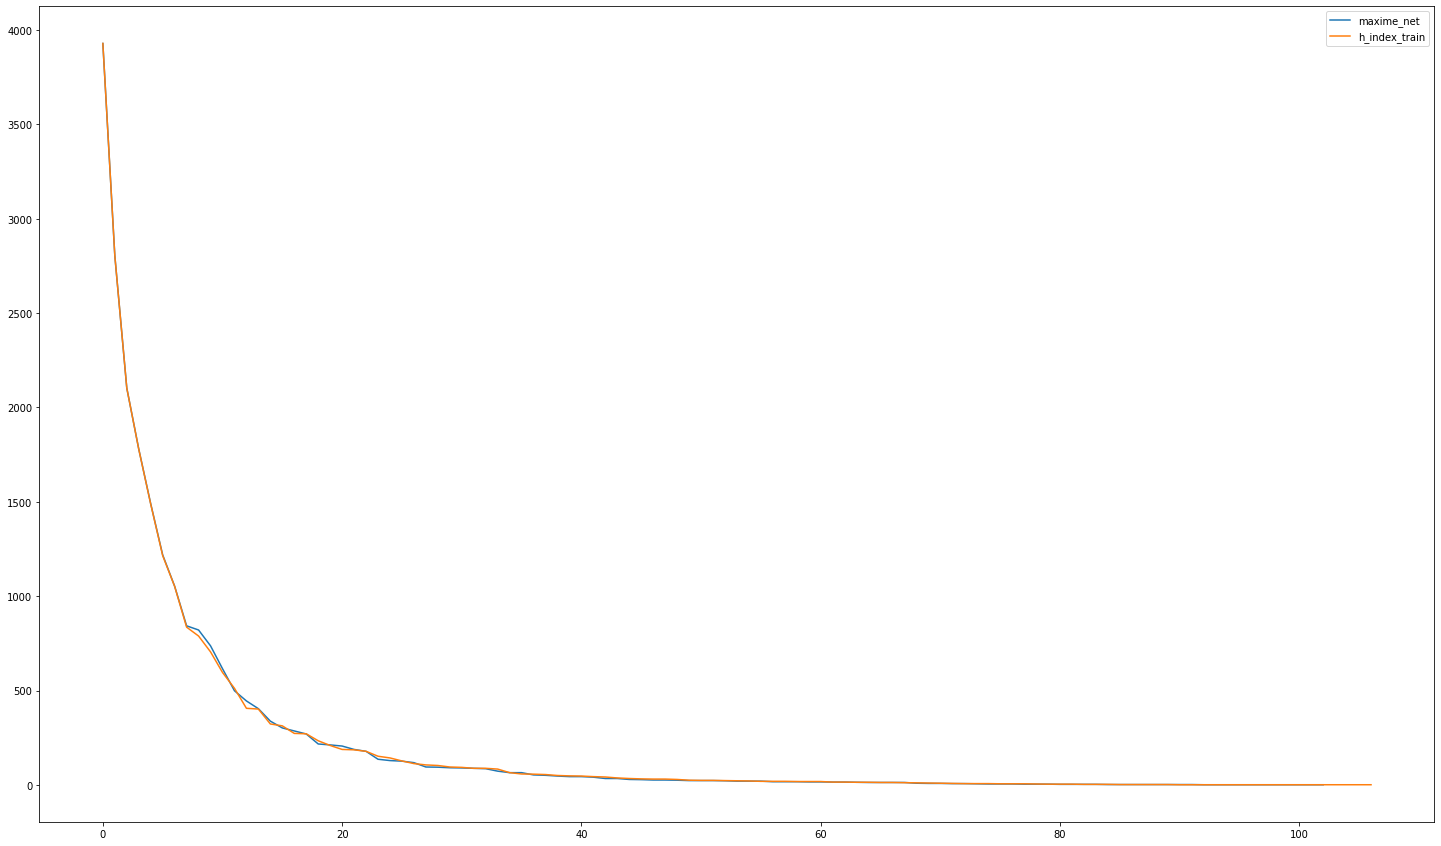

time: 443 ms (started: 2021-03-04 12:53:14 +00:00)


In [70]:
import matplotlib.pyplot as plt
from collections import Counter

b = Counter(np.rint(X_features_train))
c = Counter(y_train)

plt.figure(figsize=(25, 15))
plt.plot([x for _, x in b.most_common()], label="maxime_net")
plt.plot([x for _, x in c.most_common()], label="h_index_train")
plt.legend()

In [71]:
count_submission = {h_index: x/len(y_train) for h_index, (_, x) in enumerate(b.most_common())}
count_y_train =  {h_index: x/len(y_train) for h_index, (_, x) in enumerate(c.most_common())}

time: 3.51 ms (started: 2021-03-04 12:53:15 +00:00)


In [72]:
best_predictions = pd.read_csv("predictions_final_net.csv")
best_predictions

,authorID,h_index_pred
0,1036332,19.0
1,1101850,5.0
2,1336878,39.0
3,1515524,13.0
4,1606427,1.0
...,...,...
208110,2908387141,1.0
208111,2908425732,0.0
208112,2908436250,1.0
208113,2908499439,6.0


time: 63.1 ms (started: 2021-03-04 12:53:15 +00:00)


In [73]:
best_predictions["h_index_pred"] = best_predictions["h_index_pred"].apply(lambda x: 1. if x == 0 else x)
limit = max(best_predictions["h_index_pred"])

time: 81.3 ms (started: 2021-03-04 12:53:15 +00:00)


In [74]:
count_groups = best_predictions.groupby("h_index_pred").count().sort_values(['h_index_pred'], ascending=False)
count_groups = count_groups.query("h_index_pred <= @limit")
count_groups.reset_index(inplace=True)
count_groups.rename(columns={"authorID": "count"}, inplace=True)
count_groups

,h_index_pred,count
0,142.0,2
1,141.0,1
2,139.0,2
3,136.0,1
4,134.0,1
...,...,...
131,3.0,16414
132,2.0,27985
133,1.0,28719
134,-1.0,73


time: 33.8 ms (started: 2021-03-04 12:53:15 +00:00)


In [75]:
new_best_predictions = best_predictions.copy()
new_best_predictions.set_index("authorID", inplace=True)
num_corrections = 3

time: 4.04 ms (started: 2021-03-04 12:53:15 +00:00)


In [76]:
def correct(row):
    h_index_pred, count = row["h_index_pred"], row["count"]
    if h_index_pred > 0 and h_index_pred in count_submission and h_index_pred in count_y_train:
        diff_train_count = count_submission[h_index_pred]-count_y_train[h_index_pred]
        if diff_train_count > 0:
            num_authors_replace = int(diff_train_count*len(new_best_predictions) / (i+1)) 
            authors_id = new_best_predictions.query("h_index_pred == @h_index_pred")
            worse_authors = authors_id.merge(X_test_graph, on="authorID").sort_values(by=['paper_per_author', 'degree'], ascending=True).head(num_authors_replace)
            for authorID in worse_authors["authorID"]:
                new_best_predictions.loc[authorID, "h_index_pred"] -= 1

time: 6.71 ms (started: 2021-03-04 12:53:15 +00:00)


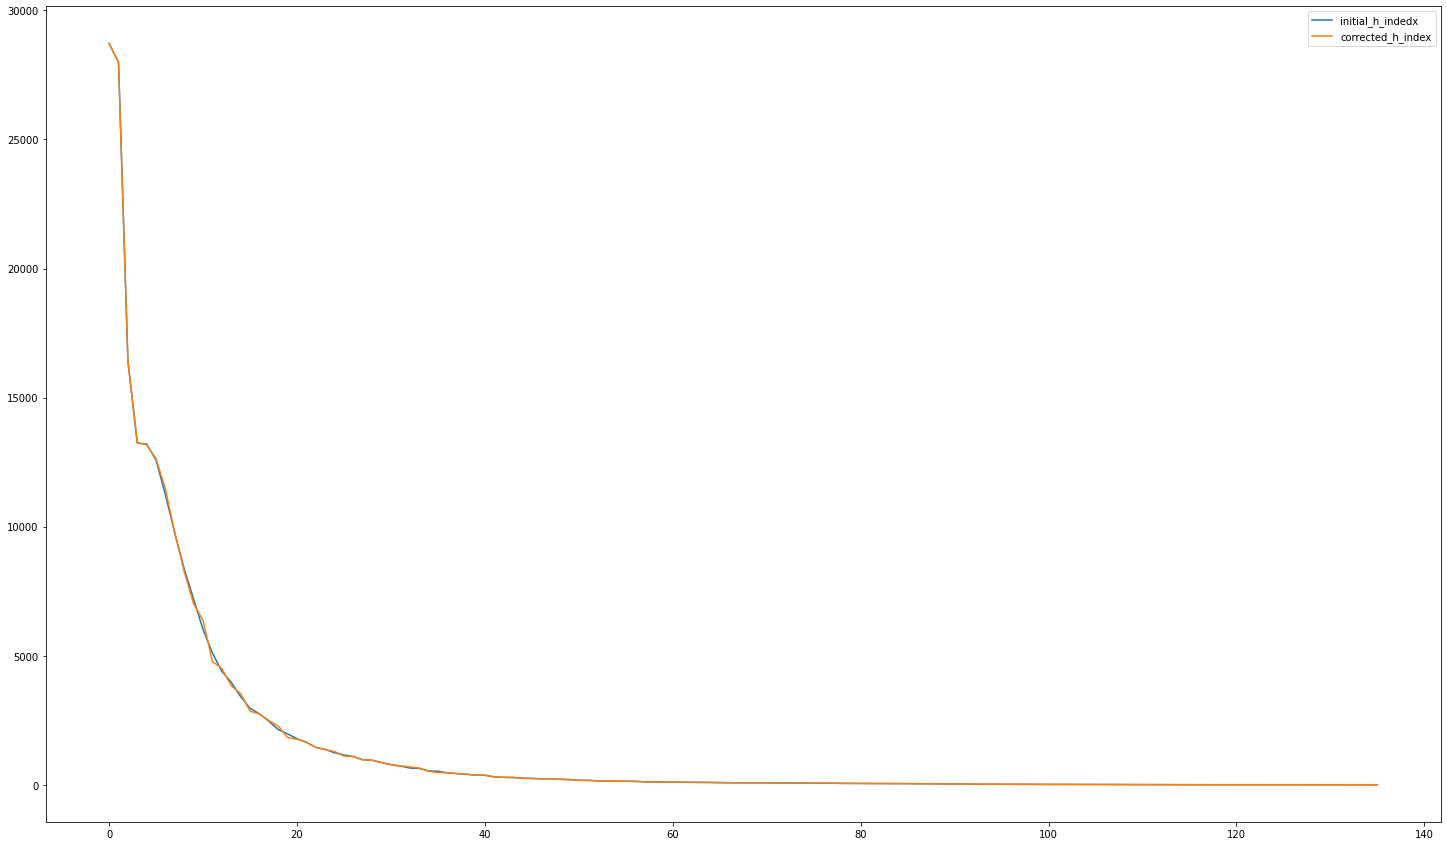

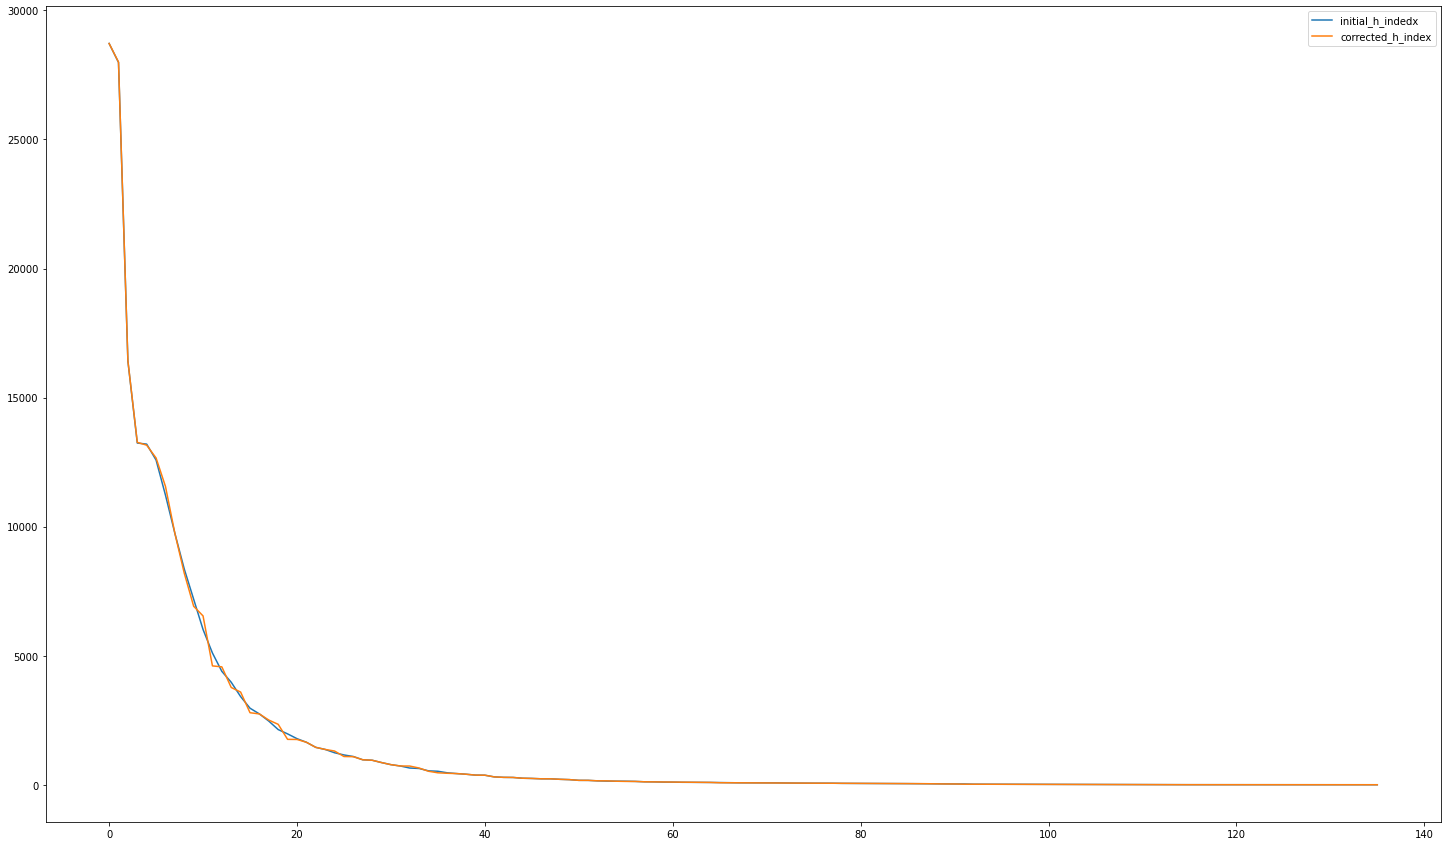

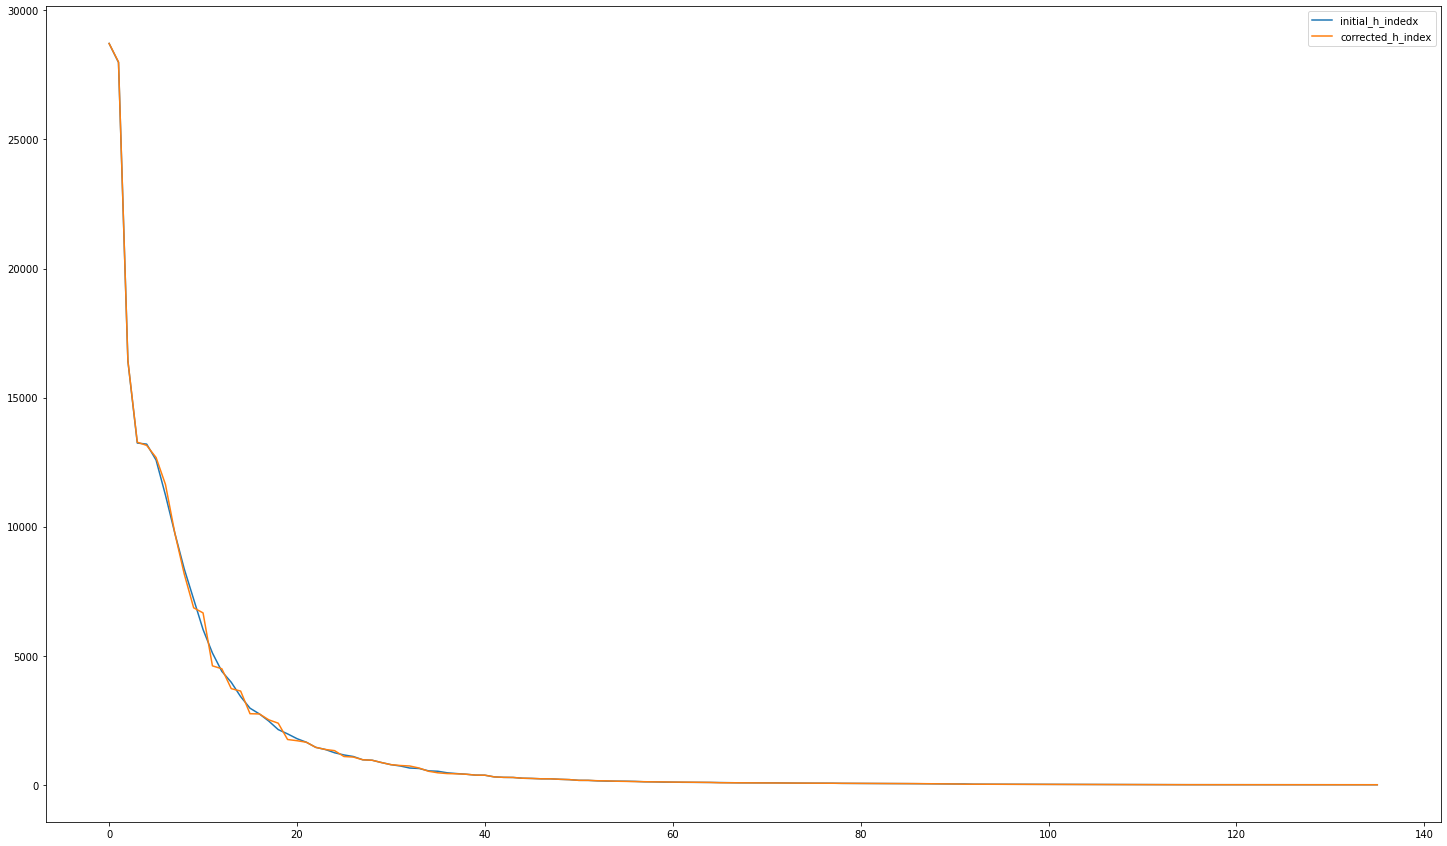

time: 8.98 s (started: 2021-03-04 12:53:15 +00:00)


In [77]:
for i in range(num_corrections):
    count_groups.apply(correct, axis=1)
    new_best_predictions["h_index_pred"] = new_best_predictions["h_index_pred"].apply(lambda x: 1. if x == 0 else x)
    old = Counter(best_predictions["h_index_pred"])
    new = Counter(new_best_predictions["h_index_pred"])


    plt.figure(figsize=(25, 15))
    plt.plot([x for _, x in old.most_common()], label="initial_h_indedx")
    plt.plot([x for _, x in new.most_common()], label="corrected_h_index")
    plt.legend()
    save_csv = new_best_predictions.copy()
    save_csv.reset_index(inplace=True)
    save_csv.rename(columns={"index": "authorID"}, inplace=True)
    save_csv.to_csv("best_predictions_correction.csv", index=False)

# Here is the opitmization with Optuna (not mandatory for the best score)

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna.trial import TrialState
in_features = X_train_final.shape[-1]

def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 1, 3)
    hidden_channels = trial.suggest_int("n_units_l00", 500, 2000)
    dropout = trial.suggest_float("dropout_l00", 0.2, 0.7)
    layers = [nn.Linear(in_features, hidden_channels),
              nn.ReLU(),
              nn.BatchNorm1d(hidden_channels),
              nn.Dropout(dropout)]
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 200, 2000)
        layers.append(nn.Linear(hidden_channels, out_features))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(out_features))
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.7)
        layers.append(nn.Dropout(p))

        hidden_channels = out_features
    layers.append(nn.Linear(out_features, 1))
    return nn.Sequential(*layers)

In [ ]:
import torch.optim as optim
def objective(trial):

    # Generate the model.
    model = define_model(trial).to(DEVICE)
    EPOCHS = 500
    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    weight_decay =  trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)
    optimizer = getattr(optim, optimizer_name)(
        model.parameters(), lr=lr, weight_decay=weight_decay
    )

    # Training of the model.
    for epoch in range(1, EPOCHS+1):
        total_loss = 0
        model.train()
        for (x, y) in train_loader:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            optimizer.zero_grad()  # Clear gradients.
            out = model(x).squeeze(1)  # Perform a single forward pass.
            loss = criterion(out, y)  # Compute the loss solely based on the training nodes
            loss.backward()  # Derive gradients.
            optimizer.step()
            total_loss += loss.item()
        test_loss = 0
        model.eval()
        for (x, y) in test_loader:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            pred = model(x).squeeze(1)  # Perform a single forward pass.
            loss = criterion(pred, y)  # Compute the loss solely based on the training nodes
            test_loss += loss.item()
        #print(f'Epoch: {epoch:03d}, Train Loss: {total_loss/len(train_loader):.4f}, Test Loss: {test_loss/len(test_loader):.4f}')
        trial.report(test_loss/len(test_loader), epoch)
        if trial.should_prune():
                    raise optuna.exceptions.TrialPruned()
    return test_loss/len(test_loader)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)